In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
insta_df = pd.read_csv('instagram_reach.csv')

In [3]:
insta_df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
insta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [5]:
insta_df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [14]:
def data_proflileing(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [15]:
data_proflileing(insta_df)

,column,dtype,nunique,null,duplicates
0,Username,object,95,0,5
1,Caption,object,94,6,5
2,Followers,int64,94,0,6
3,Hashtags,object,98,0,2
4,Likes,int64,55,0,45
5,Times since posted (hours),int64,11,0,89


## Data Cleaning

In [6]:
insta_df.drop(['Unnamed: 0','S.No'], inplace=True,axis=1)

In [7]:
#Times since posted will be better if in type of int/float, so it will be changed
Time_since_posted_in_hours=[]

for i in insta_df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

insta_df.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
insta_df['Times since posted (hours)'] = se.values
insta_df['Times since posted (hours)'] = pd.to_numeric(insta_df['Times since posted (hours)'])
insta_df = insta_df.drop('Time since posted', axis=1)

In [8]:
insta_df.head()

,Username,Caption,Followers,Hashtags,Likes,Times since posted (hours)
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


# EDA

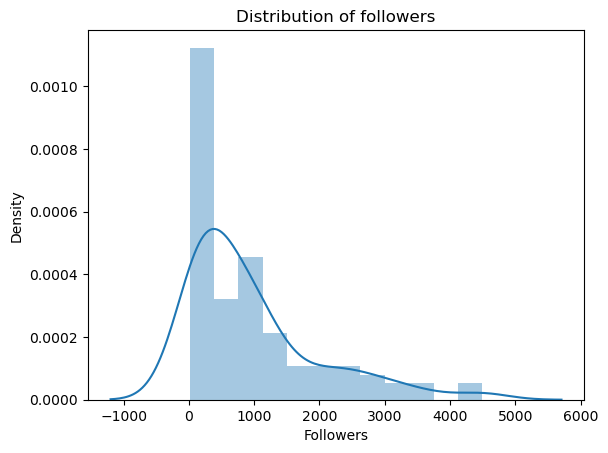

In [10]:

sns.distplot(insta_df['Followers'])
plt.title("Distribution of followers")
plt.show()

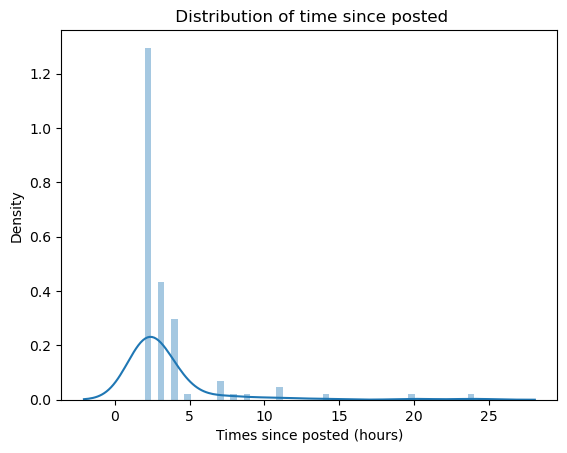

In [11]:

sns.distplot(insta_df['Times since posted (hours)'])
plt.title(' Distribution of time since posted')
plt.show()

In [17]:
from numpy import absolute
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Hastags variable

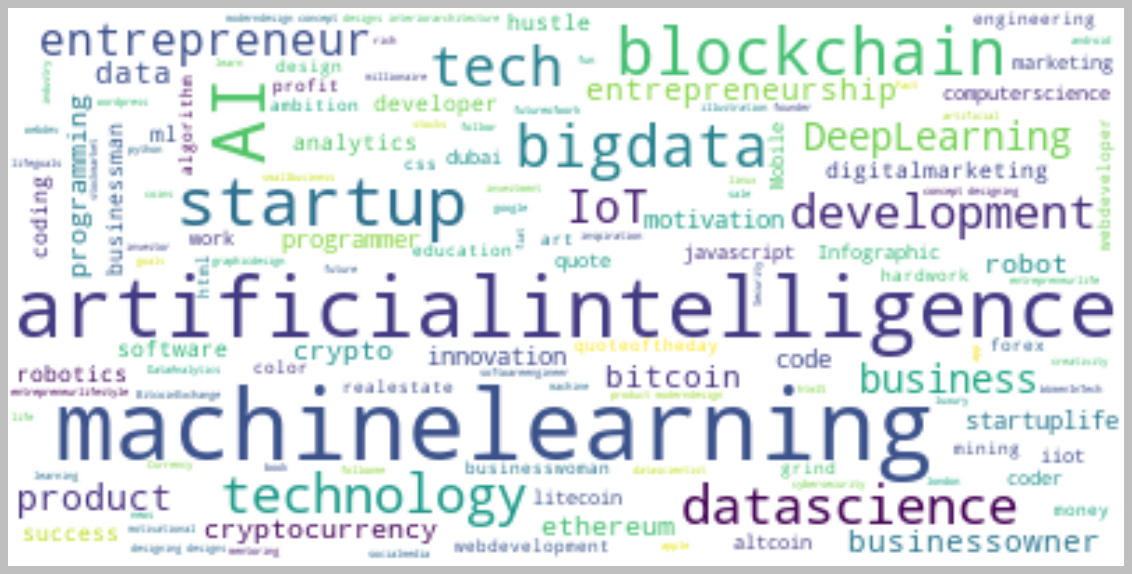

In [18]:
text = " ".join(i for i in insta_df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='Times since posted (hours)', ylabel='Likes'>

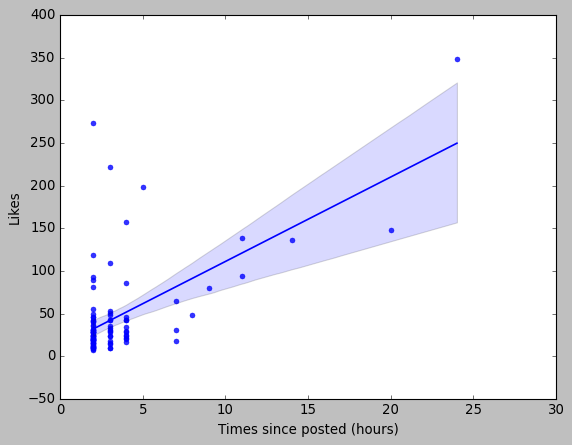

In [19]:
sns.regplot(x="Times since posted (hours)", y="Likes", data=insta_df)

<Axes: xlabel='Followers', ylabel='Likes'>

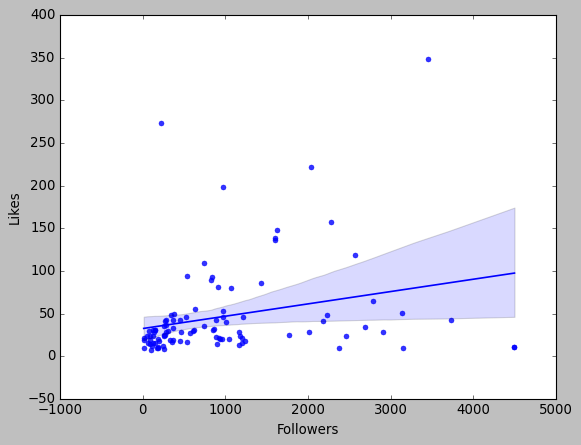

In [20]:
sns.regplot(x="Followers", y="Likes", data=insta_df)

## Splitting into train and test set

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
x = insta_df[['Followers', 'Times since posted (hours)']]
y = insta_df['Likes']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

In [33]:
model_list = [LinearRegression() , Ridge() , Lasso() , KNeighborsRegressor() , DecisionTreeRegressor() , RandomForestRegressor() , GradientBoostingRegressor() , AdaBoostRegressor(),XGBRegressor() ]
model_list1 = []
R2_score = []
mae = [] 
mape = []
mse = []

for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mape.append(round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

In [34]:
dict = {'Model':model_list1, 'R2_score':R2_score , 'MAPE':mape , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')

In [35]:
model_df

,Model,R2_score,MAPE,MAE,MSE
6,GradientBoostingRegressor,0.84,0.35,11.47,222.05
4,DecisionTreeRegressor,0.75,0.51,13.25,358.65
8,"XGBRegressor(base_score=None, booster=None, ca...",0.75,0.41,13.63,358.89
7,AdaBoostRegressor,0.72,0.55,14.17,395.00
5,RandomForestRegressor,0.70,0.56,15.02,427.55
0,LinearRegression,0.62,0.74,18.50,541.01
1,Ridge,0.62,0.74,18.46,536.14
2,Lasso,0.62,0.75,18.65,539.24
3,KNeighborsRegressor,0.43,0.67,17.56,804.26


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [37]:
#Fit the model and predict the value of test set
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 20.617 (12.604)
